In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, Birch, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/sample_data/penguins_size.csv')

# Display the first few rows of the dataset
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Introduction**

This assignment focuses on exploring and clustering a dataset of penguin measurements using various clustering techniques to understand the underlying patterns and groupings in the data. The objective is to apply preprocessing steps, explore the data through visualizations, utilize different clustering algorithms, and evaluate their performance to identify the best clustering approach.

**Setting Up and Loading Data**
**Getting Ready with Libraries**: start by bringing in all the tools we need. This includes:

  pandas and numpy for playing with data,
  matplotlib and seaborn for making our data look cool with charts,
  and a bunch of sklearn stuff for the real magic part, clustering and preparing our data.

**Bringing in the Penguins**: Load a dataset all about penguins. Why? Because and we want to see how they group together based on their sizes and other features.Then we take a quick look at the first few rows of our dataset. It's like saying hello to our penguin friends and seeing how they're doing.



In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Drop rows with missing values (if any)
data = data.dropna()

# Select features for clustering (adjust the column indices as necessary)
# Here I assume the clustering will be done based on numerical features only
X = data.select_dtypes(include=[np.number]).values

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


**Cleaning and Prepping Data**

*   Missing Penguins: First, we check if any penguin data is missing because every penguin counts. If we find any missing data, we say goodbye to those rows to keep things tidy.

*   Choosing Penguin Features: We decide which features (like flippers length, beak depth, etc.) we want to use to group our penguins. We stick to numbers because that's what our clustering tools understand best.

*   Making Features Comparable: Penguins come in all shapes and sizes, but we need to standardize these sizes (make them comparable) so that one feature doesn't dominate over others just because of its scale.

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


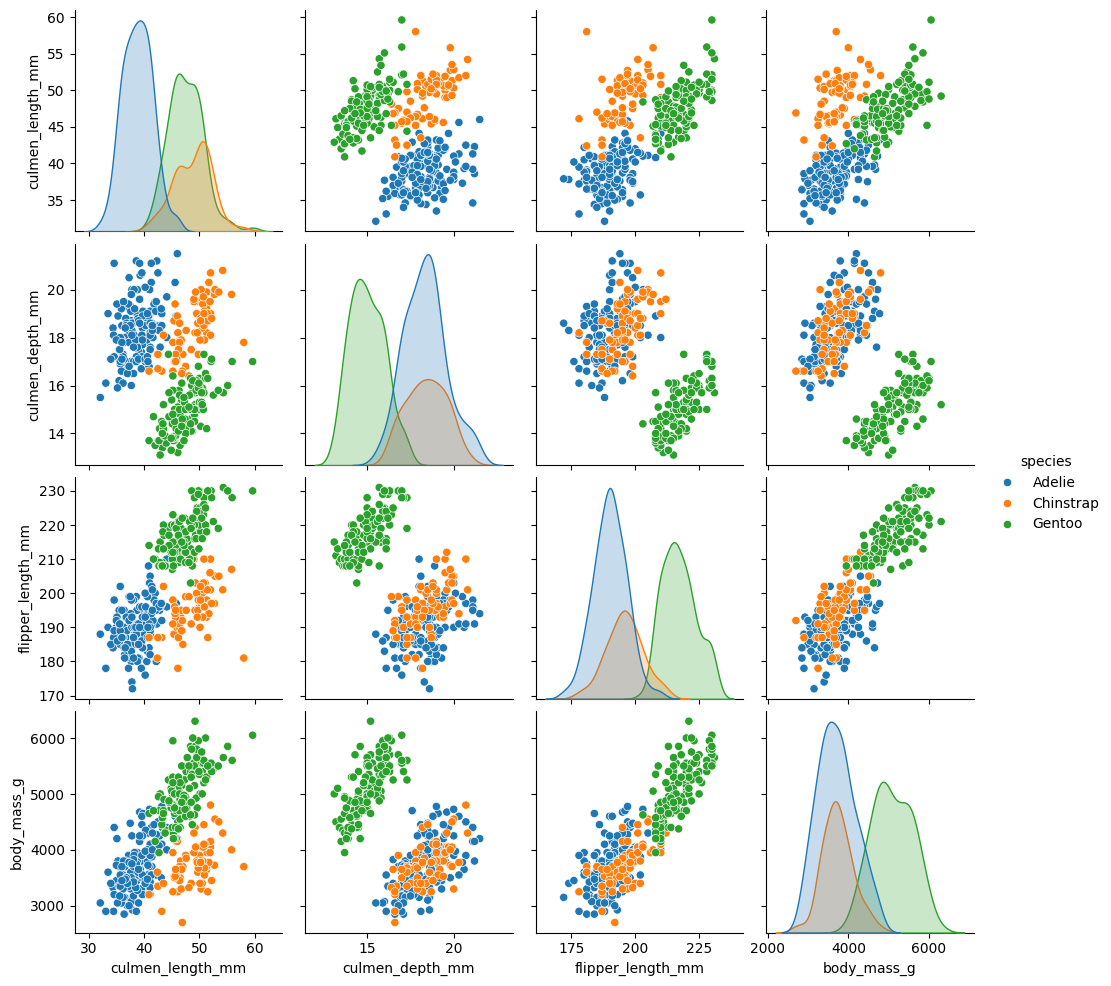

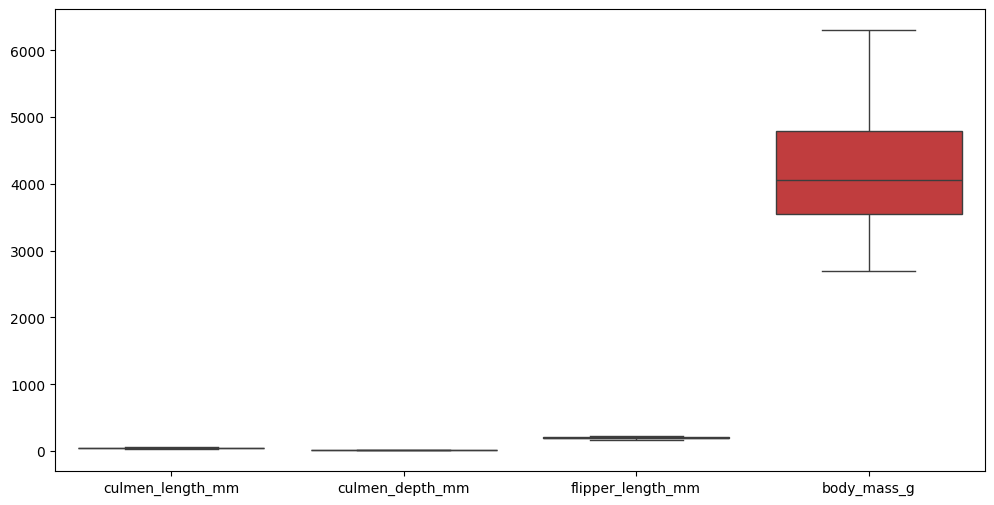

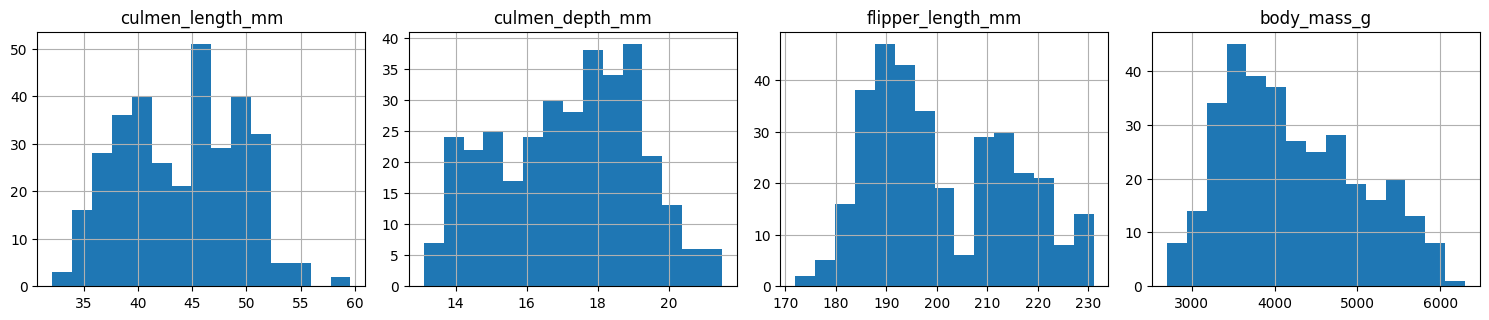

In [ ]:
# Basic statistics of the dataset
print(data.describe())

# Pairplot to visualize the relationships between features
sns.pairplot(data.dropna(), hue='species') # Replace 'species' with the actual column name for species if different

# Boxplot to visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))

# Histograms to visualize the distribution of numerical features
data.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 6), layout=(2, 4))

plt.tight_layout()
plt.show()

**Deeper into Penguin Data**

*   Statistics on Penguins: Generate some basic stats to get a feel of the penguin world - like the average flipper size, the heaviest penguin, etc.
*   Penguin Visuals:
Pairplot: A detective tool to see how features relate to each other
across species.
Boxplot: To spot any penguin outliers and the range of their features.
Histograms: To see the distribution of our penguins' features, like how many penguins fall into different weight categories.



In [ ]:
# Assuming 'X_scaled' is the preprocessed data from Block 2

# Apply PCA for dimensionality reduction to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# X_pca is now the PCA-reduced data which can be used for visualizations


**Simplifying Penguin Dimensions**

*   PCA: We use PCA (Principal Component Analysis) to simplify our penguin features into two broad ones without losing much info. You can imagine squishing a 3D penguin world into a flat 2D map but still keeping all the interesting parts visible.

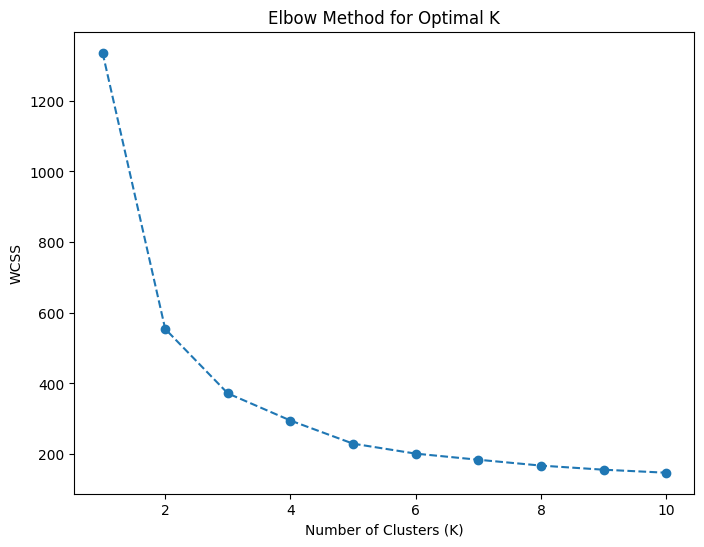

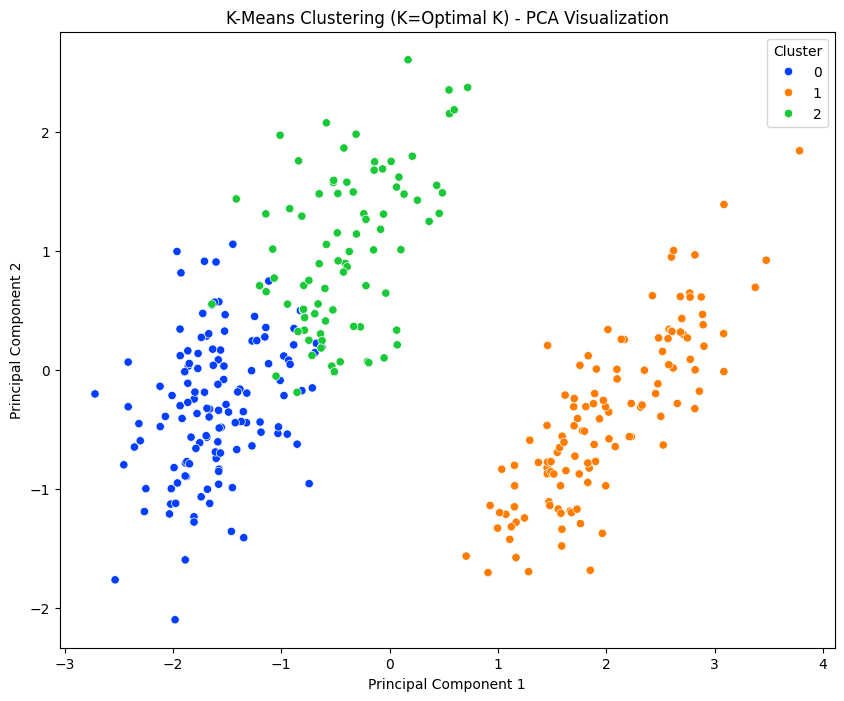

Silhouette Score for K-Means: 0.45


In [ ]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the elbow plot
optimal_k = 3  # Replace with the number of clusters you choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters using the PCA-reduced data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_kmeans, palette='bright')
plt.title('K-Means Clustering (K=Optimal K) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Calculate silhouette scores to evaluate clustering quality
silhouette_avg_kmeans = silhouette_score(X_scaled, cluster_labels_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_avg_kmeans:.2f}')

# Add additional clustering algorithms and their evaluations here as needed


**Grouping Penguins with K-Means**

*   Finding the Penguin Packs: We use the Elbow method to find out how many groups (clusters) of penguins we should have. It's like figuring out how many tables we need at a penguin party.
*   K-Means Party: We then invite our penguins to join these tables (clusters) using K-Means, ensuring each penguin finds the right spot.
*   How Good was the Party?: We check this by calculating the silhouette score, which tells us if the penguins enjoyed their groups or if they were just pretending.

In [ ]:
# Dictionary to store cluster labels for different models
cluster_labels = {}

# DBSCAN Clustering
dbscan = DBSCAN()
cluster_labels['DBSCAN'] = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
cluster_labels['Agglomerative'] = agg_clustering.fit_predict(X_scaled)

# Birch Clustering
birch = Birch(n_clusters=optimal_k)
cluster_labels['Birch'] = birch.fit_predict(X_scaled)

# OPTICS Clustering
optics = OPTICS()
cluster_labels['OPTICS'] = optics.fit_predict(X_scaled)

# Calculate and print silhouette scores for each clustering model
for model_name, labels in cluster_labels.items():
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score for {model_name}: {silhouette_avg:.2f}')

# Visualization of clusters for each model (Optional)
# visualize the clusters for each of these models using a similar scatter plot as before


Silhouette Score for DBSCAN: 0.25
Silhouette Score for Agglomerative: 0.45
Silhouette Score for Birch: 0.45
Silhouette Score for OPTICS: -0.36




*   We test out other clustering methods (like DBSCAN, Agglomerative Clustering, Birch, and OPTICS) to see if they can create a better party atmosphere for our penguins.
*   Party Review Scores: For each method, we calculate the silhouette score again to see which one made the penguins happiest.



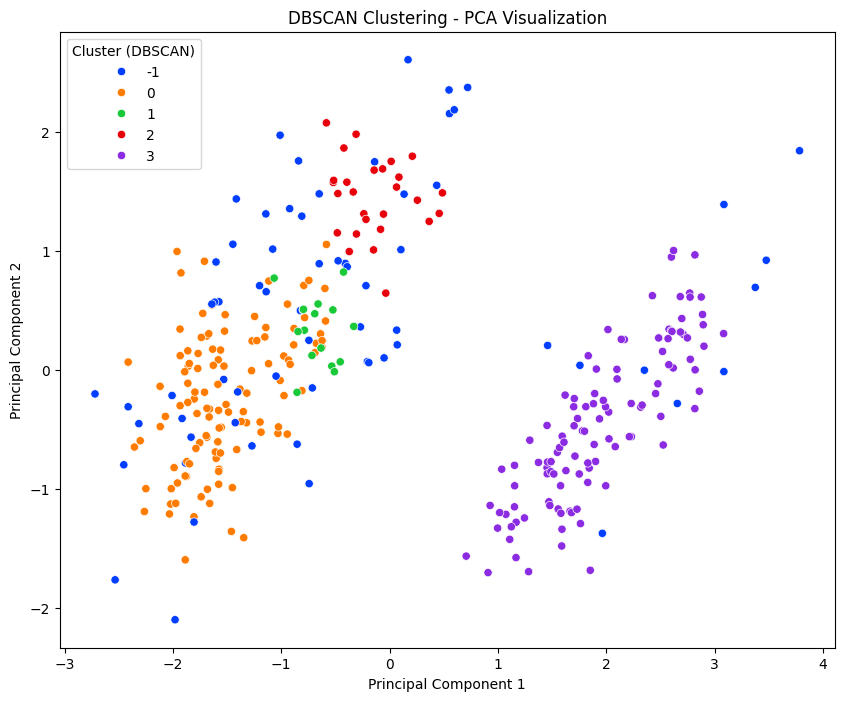

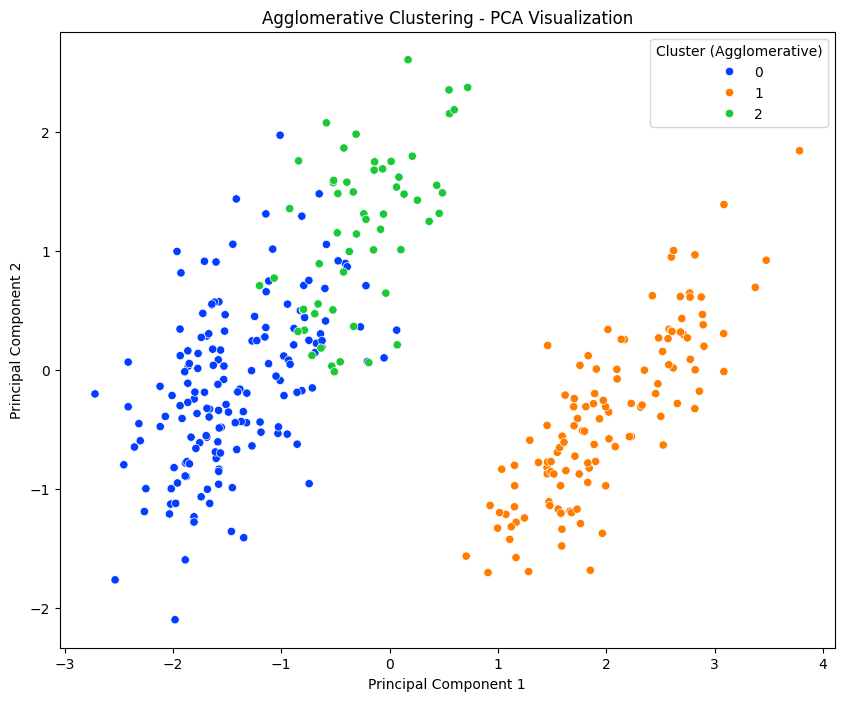

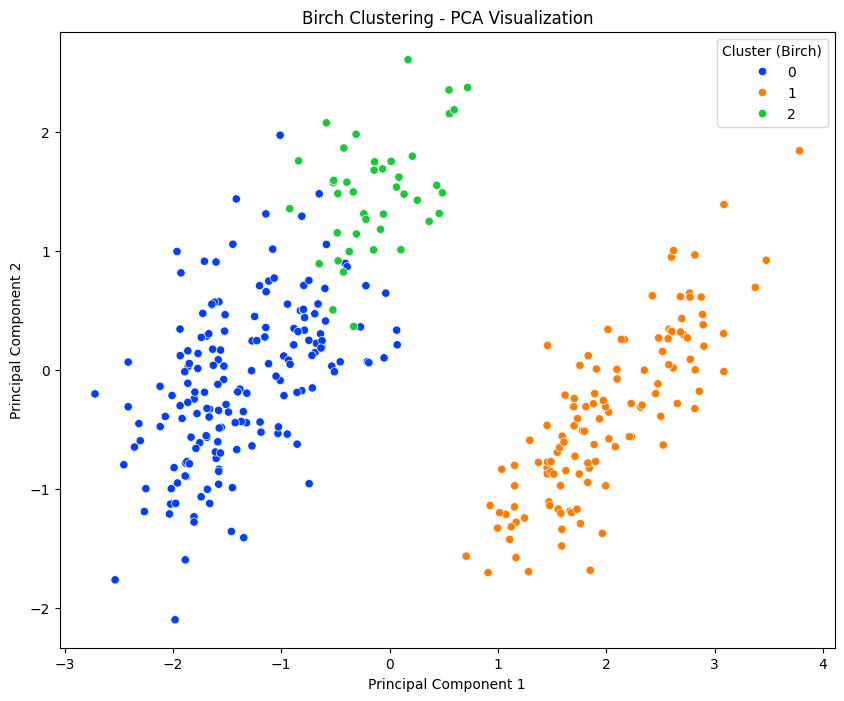

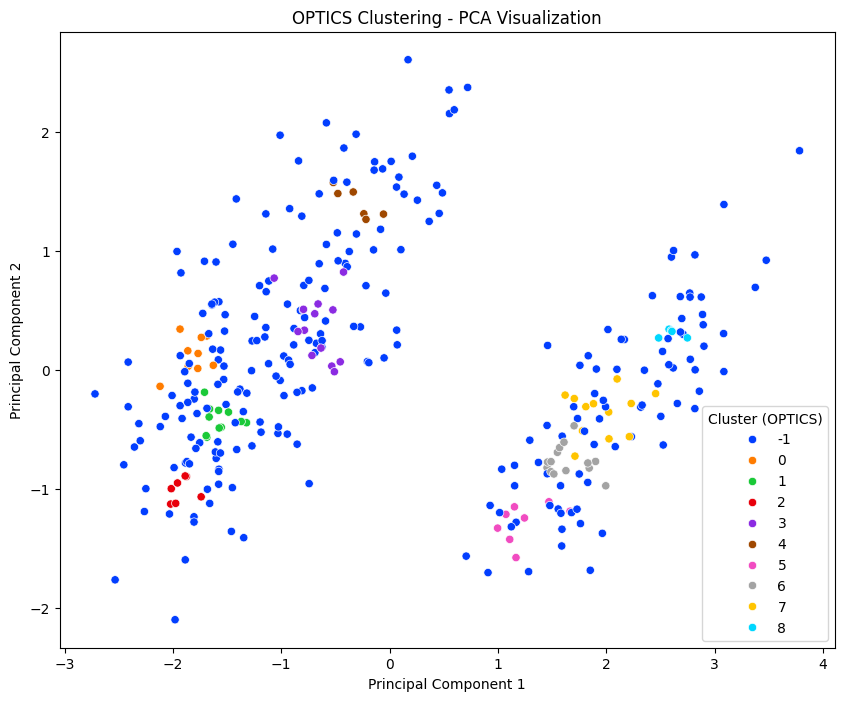

In [ ]:
# Visualize the clusters for each clustering model
for model_name, labels in cluster_labels.items():
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright')
    plt.title(f'{model_name} Clustering - PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title=f'Cluster ({model_name})')
    plt.show()


Centroids of the clusters created by K-Means:
[[-1.04864448  0.48918337 -0.8847164  -0.76559878]
 [ 0.65076426 -1.09822981  1.15835787  1.09698206]
 [ 0.67274619  0.80803437 -0.29264151 -0.38677183]]


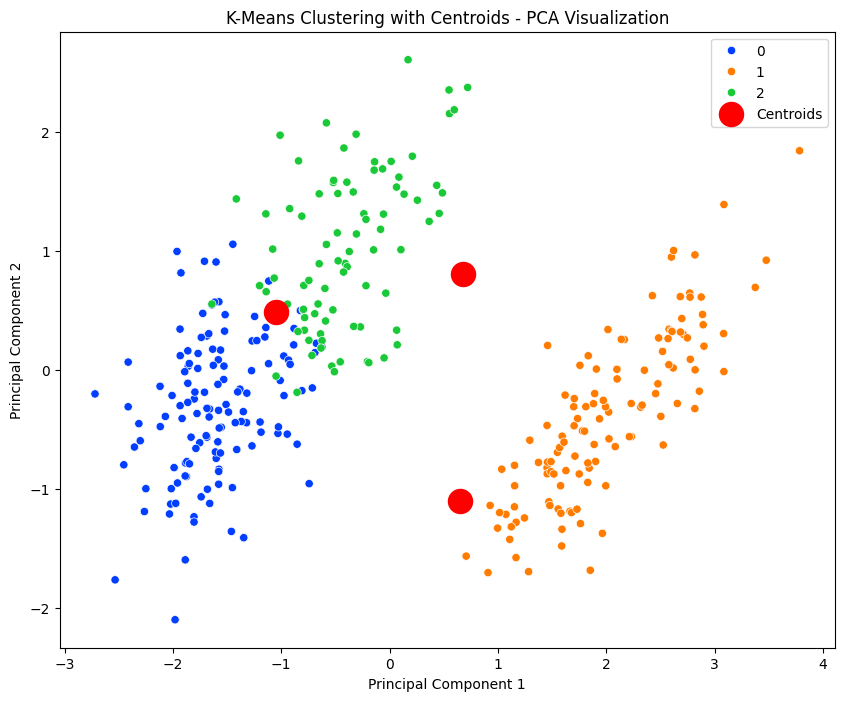

In [ ]:
# Example: Investigating Cluster Centroids for K-Means
kmeans_centroids = kmeans.cluster_centers_
print("Centroids of the clusters created by K-Means:")
print(kmeans_centroids)

# visualize these centroids on the PCA-reduced plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_kmeans, palette='bright')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroids - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



*   Spotting the Leaders: We find and highlight the central penguins (centroids) in the K-Means groups. These are like the most typical penguins of each cluster.
*  Centroid Showoff: We visualize these central penguins on our 2D map, marking them out so everyone can see who the chief penguins are.

In [ ]:
# Calculate silhouette scores for each clustering model
silhouette_scores = {}
for model_name, labels in cluster_labels.items():
    if np.unique(labels).size > 1:  # To ensure the model has created more than one cluster
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores[model_name] = silhouette_avg
    else:
        silhouette_scores[model_name] = None  # For models that create only one cluster

# Display silhouette scores for each model
for model_name, score in silhouette_scores.items():
    if score is not None:
        print(f'Silhouette Score for {model_name}: {score:.2f}')
    else:
        print(f'{model_name} did not create distinct clusters')

# Determine the best performing model
best_model = max(silhouette_scores, key=silhouette_scores.get)
print(f'\nThe best performing model is {best_model} with a silhouette score of {silhouette_scores[best_model]:.2f}')

Silhouette Score for DBSCAN: 0.25
Silhouette Score for Agglomerative: 0.45
Silhouette Score for Birch: 0.45
Silhouette Score for OPTICS: -0.36

The best performing model is Birch with a silhouette score of 0.45




*   Final Scores: We revisit our silhouette scores for all the clustering methods to definitively decide which method was the best
*   We announce the clustering method that made the penguins the happiest, based on our silhouette scores.



General Explainations:

**K-Means Clustering**
K-Means is a popular unsupervised machine learning algorithm used for clustering data points into a predefined number of groups (clusters). It operates by identifying k centroids (one for each cluster) and assigning each data point to the nearest centroid, thus forming clusters. The algorithm iterates through two main steps:


*   Assignment Step: Assign each data point to the closest centroid, based on the Euclidean distance between the data point and the centroid.
*   Update Step: Recalculate the centroids as the center (mean) of all data points assigned to each cluster.
The process repeats until the assignment of data points to clusters no longer changes, indicating that the algorithm has converged and the clusters are stable.

**Principal Component Analysis (PCA)**
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form, retaining as much of the data's variation as possible. It identifies the directions (principal components) that maximize the variance in the data, allowing for a simplified view of complex datasets. This is particularly useful for visualization and can improve the efficiency of clustering algorithms by reducing the curse of dimensionality.

**Silhouette Score**
The silhouette score is a metric used to calculate the goodness of a clustering technique. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This score provides a concise measure of the effectiveness of the clustering.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
DBSCAN is a clustering algorithm that groups together closely packed points and marks points that lie alone in low-density regions as outliers. Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance, making it suitable for data with complex shapes and varying densities.

**Agglomerative Clustering**
Agglomerative Clustering is a type of hierarchical clustering that builds nested clusters by merging or splitting them successively. This method starts with each data point as its own cluster and merges them into larger clusters based on a distance metric and linkage criteria (e.g., ward, average, complete).

**Birch (Balanced Iterative Reducing and Clustering using Hierarchies)**
Birch is designed for clustering large datasets by incrementally constructing a tree structure that captures the data's clustering structure. It efficiently handles noise and outliers, making it suitable for large datasets with a mix of dense and sparse regions.

**OPTICS (Ordering Points To Identify the Clustering Structure)**
OPTICS is similar to DBSCAN but handles varying densities better. It creates an ordering of points so that spatially closest points become neighbors in the ordering, allowing it to identify clusters of varying densities.

**StandardScaler**
StandardScaler is a preprocessing technique that standardizes features by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the analysis, which is important for algorithms like K-Means that are sensitive to the scale of the data.